# Pearson correlation coefficient

Is a popular way to assess the strength of the linear relationship between variables.

In [1]:
from itertools import compress
import numpy as np
import matplotlib.pyplot as plt

Suppose we have to arrays of values:

$X=\left\{ x_i \right\}$, $Y=\left\{y_i\right\}, i =\overline{1,n}$.

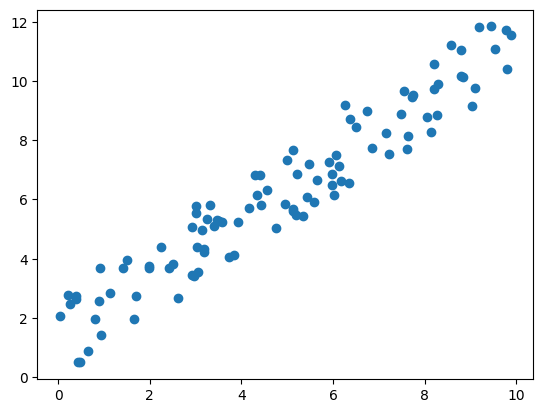

In [2]:
np.random.seed(10)

sample_size = 100
X = np.random.uniform(0, 10, sample_size)
Y = X + np.random.uniform(0, 3, sample_size)

X_mean = X.mean()
Y_mean = Y.mean()

plt.scatter(X, Y)
plt.show()

## Covariation

Is a value in numerator of the Pirosn correlation coefficient. It can be written as:

$$cov=\sum_{i=1}^n(x_i-\overline{X})(y_i -  \overline{Y})$$

In [3]:
def get_ticks_with_average(ticks, labels, tick, label):
    '''
    Lets you add new ticks and labels
    without overlapping with existing 
    labels on the chart
    '''
    available_ticks_mask = (np.abs(ticks - tick) > 0.5)
    ticks = ticks[available_ticks_mask]
    labels = list(compress(labels, available_ticks_mask))
    X_ticks = {
        **dict(zip(ticks, [l.get_text() for l in labels])),
        tick : label
    }
    return dict(
        ticks=list(X_ticks.keys()), 
        labels=list(X_ticks.values())
    )

def plot_mean_ticks():
    
    plt.xticks(
        **get_ticks_with_average(
            *plt.xticks(), 
            tick=X_mean,
            label="$\overline{X}$",
        )
    )
    plt.yticks(
        **get_ticks_with_average(
            *plt.yticks(),
            tick=Y_mean,
            label="$\overline{Y}$"
        )
    )

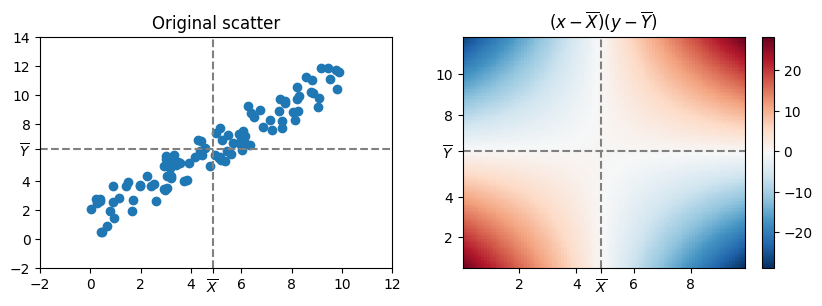

In [4]:
plt.figure(figsize=[10, 3])

plt.subplot(121)
plt.title("Original scatter")
plt.scatter(X,Y)
plt.axvline(X_mean, color="grey", linestyle="--")
plt.axhline(Y_mean, color="grey", linestyle="--")
plot_mean_ticks()

plt.subplot(122)
plt.title("$(x-\overline{X})(y-\overline{Y})$")
x_min, x_max = X.min(), X.max()
y_min, y_max = Y.min(), Y.max()
x_space = np.linspace(x_min, x_max, 100)
y_space = np.linspace(y_min, y_max, 100)
x_mesh, y_mesh = np.meshgrid(x_space, y_space)
z_mesh = (x_mesh - X_mean)*(y_mesh - Y_mean)
plt.pcolormesh(x_mesh, y_mesh, z_mesh, cmap="RdBu_r")
plt.colorbar()
plt.axvline(X_mean, color="grey", linestyle="--")
plt.axhline(Y_mean, color="grey", linestyle="--")
plot_mean_ticks()
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


plt.show()